In [1]:
import pandas as pd
import gzip
from tqdm import tqdm
import json
pd.set_option('display.max_colwidth', None)

In [76]:
i = 0
list_of_q = []
# with gzip.open('../tiny-dev/nq-dev-sample.jsonl.gz') as f:
# with gzip.open('../tiny-dev/v1.0-simplified_nq-dev-all.jsonl.gz') as f:
with gzip.open('../tiny-dev/v1.0-simplified_simplified-nq-train.jsonl.gz') as f: 
    for line in tqdm(f):
        list_of_q.append(line)
        i += 1

307373it [02:09, 2378.76it/s]


In [62]:

short1 = pd.read_csv('scores_short_answer_only_10k.csv')

In [63]:
short2 = pd.read_csv('scores_short_answer_only_10k_20k.csv')

In [64]:
dev = pd.read_csv('scores_first_second_run.csv')

In [65]:
short1 = short1.drop(['Unnamed: 0'], axis = 1)
short2 = short2.drop(['Unnamed: 0'], axis = 1)


In [66]:
dev = dev.drop(['Unnamed: 0'], axis = 1)

In [67]:
short1 = short1.rename(columns = {'Avg Score: 2021-05-02 14:34:03.614988': 'Current Average Score', 'Predicted: 2021-05-02 14:34:03.614988': 'Current Predicted'})


short2 = short2.rename(columns = {'Avg Score: 2021-05-04 05:37:52.352568': 'Current Average Score', 'Predicted: 2021-05-04 05:37:52.352568': 'Current Predicted'})




In [68]:
short_answers = pd.concat([short1, short2], ignore_index = True)

In [69]:
good_short_answers = short_answers[~short_answers.isin(['Redirect', 'No Edit','.']).any(axis=1)]

good_short_answers.shape

(11957, 13)

<AxesSubplot:xlabel='Overall Avg', ylabel='Avg Score: original'>

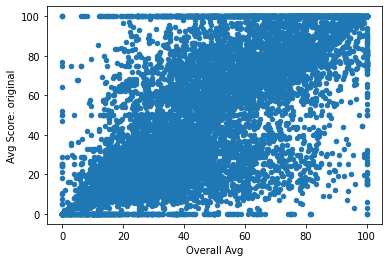

In [70]:
good_short_answers.plot.scatter('Overall Avg', 'Avg Score: original')

In [85]:
len(list_of_q)

307373

In [90]:
def load_and_get_tile(q):
    x = json.loads(q)
    return (x["document_url"][x["document_url"].index("title")+6:x["document_url"].index("&amp")], x['question_text'])
    

In [94]:
q_and_t = [load_and_get_tile(q) for q in list_of_q]


In [101]:
qtdf = pd.DataFrame(data = q_and_t, columns = ['Title','Question'])

In [110]:
good_short_answers = good_short_answers.merge(qtdf, how = 'inner', on = 'Question')

In [143]:
cols = above70.filter(regex = r'Av.*Score($|:\s+\d+)').columns

for c in cols:
    above70[c + '_len'] = above70[c].str.len(axis = 1)

AttributeError: Can only use .str accessor with string values!

In [122]:
above70 = good_short_answers[good_short_answers['Avg Score: original'] > 70]
above70['max - min'] = above70.filter(regex = r'Av.*Score($|:\s+\d+)').max(axis = 1) - above70.filter(regex = r'Av.*Score($|:\s+\d+)').min(axis = 1) 



<ipython-input-122-16d6d868138a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above70['max - min'] = above70.filter(regex = r'Av.*Score($|:\s+\d+)').max(axis = 1) - above70.filter(regex = r'Av.*Score($|:\s+\d+)').min(axis = 1)


In [219]:
above70.sort_values(['max - min']).sample(15)

,Overall Avg,GT Answers,Question,Avg Score: original,Prediction: original,Avg Score: 2010-01-01 00:00:00,Predicted: 2010-01-01 00:00:00,Avg Score: 2014-01-01 00:00:00,Predicted: 2014-01-01 00:00:00,Avg Score: 2018-01-01 00:00:00,Predicted: 2018-01-01 00:00:00,Current Average Score,Current Predicted,Title,max - min
3268,38.750,"1936 , --",when did the story to kill a mockingbird take place,100.0,1936,0.0,during three years of the Great Depression,0.0,during three years of the Great,100.0,1936,55.0,1933–35),To_Kill_a_Mockingbird,100.0
1714,63.000,The Statler Brothers --,who sings the song counting flowers on the wall,100.0,The Statler Brothers,25.0,"Bruce Willis,",27.0,Bruce Willis's character,100.0,The Statler Brothers.,100.0,The Statler Brothers.,Flowers_on_the_Wall,75.0
2441,50.500,2017 --,when was last time richmond played in a grand final,100.0,2017,25.0,1980,27.0,"1995, 2001 and 2013",100.0,2017,50.0,2020,Richmond_Football_Club,75.0
6084,100.000,60 ° --,what is the size of the angles of an equilateral triangle,100.0,60 °,100.0,60°,100.0,60°,100.0,60°,100.0,60°,Equilateral_triangle,0.0
621,85.250,music composed by Jimmy McHugh -- lyrics by Dorothy Fields --,who wrote on the sunny side of the street,83.5,music composed by Jimmy McHugh and lyrics by Dorothy Fields,87.0,"Dorothy Fields,",83.5,"music composed by Jimmy McHugh and lyrics by Dorothy Fields,",83.5,music composed by Jimmy McHugh and lyrics by Dorothy Fields.,87.0,Dorothy Fields.,On_the_Sunny_Side_of_the_Street,3.5
649,84.500,the Treasure Coast of the state of Florida --,de donde es el area 722 en usa,82.5,Area code 772 - Wikipedia Area code 772 serves the Treasure Coast of the state of Florida,66.0,Area code 772 serves the state of Florida.,90.0,Area code 772 serves the Treasure Coast of the state of Florida.,92.0,code 772 serves the Treasure Coast of the state of Florida.,90.0,Area code 772 serves the Treasure Coast of the state of Florida.,Area_code_772,26.0
907,79.000,after a minor infringement --,when do you have a scrum in rugby union,79.0,a scrum is a means of restarting play after a minor infringement,79.0,a scrum is a means of restarting play after a minor infringement,79.0,a scrum is a means of restarting play after a minor infringement,79.0,a scrum is a means of restarting play after a minor infringement,79.0,a scrum is a means of restarting play after a minor infringement,Scrum_(rugby_union),0.0
6780,80.750,Renée Armand -- Sam Brown III --,who wrote the song one day in your life,100.0,Renée Armand,23.0,"""One Day in Your Life"" is a song recorded by Michael Jackson",100.0,Renée Armand,100.0,"Renée Armand,",100.0,"Renée Armand,",One_Day_in_Your_Life_(Michael_Jackson_song),77.0
508,88.500,the shareholders --,the board of directors of a u.s. corporation is elected by,93.0,shareholders,75.0,the stockholders,93.0,shareholders,93.0,shareholders,93.0,shareholders,Board_of_directors,18.0
1791,61.875,May 2006 --,when did the first apple macbook come out,83.5,2006,64.0,10 January 2006,83.5,2006,50.0,2010,50.0,2005,MacBook,33.5


In [169]:
good_indices = [8701, 8159, 2001, 2851, 3681, 2664, 1410, 6671, 2520, 7069, 7213]
interesting_cases = [2462, 2033, 2497, 7822]
bad_answers = [6838, 8417, 10537, 6828, 779,]
false_neg = [1094]

In [164]:
short_new_years = pd.read_csv('scores_short_answer_only_0_20k_new_dates.csv')

In [166]:
short_new_years = short_new_years.drop(['Unnamed: 0'], axis = 1)

In [210]:
above70.loc[[6671, 2520, 2664]]

,Overall Avg,GT Answers,Question,Avg Score: original,Prediction: original,Avg Score: 2010-01-01 00:00:00,Predicted: 2010-01-01 00:00:00,Avg Score: 2014-01-01 00:00:00,Predicted: 2014-01-01 00:00:00,Avg Score: 2018-01-01 00:00:00,Predicted: 2018-01-01 00:00:00,Current Average Score,Current Predicted,Title,max - min
6671,83.000,"13,620 --",what is the population of the dalles oregon,100.0,"13,620",32.0,"12,156 at the 2000 census",100.0,"13,620",100.0,"13,620",100.0,"13,620","The_Dalles,_Oregon",68.0
2520,49.750,500 --,how many championships does the pac 12 have,100.0,500,33.0,380,33.0,452,100.0,500,33.0,529,List_of_Pac-12_Conference_national_championships,67.0
2664,47.375,"Paris , France --",who is going to host the 2024 olympics,100.0,"Paris , France",27.0,winning bid should be announced in 2017,18.0,a city elected by the International Olympic Committee.,48.5,Paris from 2 to 18 August 2024.,96.0,"Paris, France.[1]",2024_Summer_Olympics,78.0


In [211]:
false_positive = [1410]

In [212]:
above70.loc[false_positive]

,Overall Avg,GT Answers,Question,Avg Score: original,Prediction: original,Avg Score: 2010-01-01 00:00:00,Predicted: 2010-01-01 00:00:00,Avg Score: 2014-01-01 00:00:00,Predicted: 2014-01-01 00:00:00,Avg Score: 2018-01-01 00:00:00,Predicted: 2018-01-01 00:00:00,Current Average Score,Current Predicted,Title,max - min
1410,69.125,6.2 to 6.9 percent --,what percent of germany's energy comes from solar power,100.0,6.2 to 6.9 percent,73.5,1 percent,23.5,40% of total electricity consumption,100.0,6.2 to 6.9 percent,79.5,8.2 percent,Solar_power_in_Germany,76.5
